# Analyzing CENSUS 2018 data from Brazil's Hospitals

In [1]:
#-- importing libraries
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#-- open excel file
db = pd.read_excel('Lista Hospitais SUS 06-2018.xlsx', sheet_name='Plan1')
db.head()

,COMPETÊNCIA,UF,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CNPJ,CNPJ MANTENEDORA,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
0,201805,AC,120001,ACRELANDIA,7245890,CEMEF,CENTRO MEDICO DA FAMILIA LTDA ME,RUA GERALDO BARBOSA - 296 - CENTRO,69945000,2062 - SOCIEDADE EMPRESARIA LIMITADA,M,04 - POLICLINICA,1.092371e+13,NaN,NÃO,-,-,2,-
1,201805,AC,120010,BRASILEIA,2001500,HOSPITAL RAIMUNDO CHAAR,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,69932000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,4.034526e+12,4.034526e+12,SIM,42,42,167,591
2,201805,AC,120020,CRUZEIRO DO SUL,2000172,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,SECRETARIA DE ESTADO DE SAUDE,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,4.034526e+12,4.034526e+12,SIM,20,20,38,31
3,201805,AC,120020,CRUZEIRO DO SUL,2000229,CLINICA SANTA MARIA,CLINICA SANTA MARIA,AV GETULIO VARGAS - 805 - CENTRO,69980000,3999 - ASSOCIACAO PRIVADA,E,04 - POLICLINICA,4.413820e+11,NaN,NÃO,-,-,1,-
4,201805,AC,120020,CRUZEIRO DO SUL,2000296,HOSPITAL DA MULHER E DA CRIANCA DO JURUA,SECRETARIA DE ESTADO DE SAUDE,AVENIDA LAURO MULLER - 0351 - CENTRO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,07 - HOSPITAL ESPECIALIZADO,4.034526e+12,4.034526e+12,SIM,68,46,309,1082


In [3]:
#-- analysing db structure
print('Number os rows = ' + str(db.shape[0]) + '\n' + 'Number of columns = ' + str(db.shape[1]))

Number os rows = 62174
Number of columns = 19


In [4]:
#-- verifying columns with missing values
db.isnull().sum().sort_values(ascending=False)/len(db)

CNPJ MANTENEDORA     0.856934
CNPJ                 0.124924
Nº INTERNAÇÕES       0.000000
ENDEREÇO             0.000000
UF                   0.000000
IBGE                 0.000000
MUNICÍPIO            0.000000
CNES                 0.000000
NOME FANTASIA        0.000000
RAZÃO SOCIAL         0.000000
NATUREZA JURÍDICA    0.000000
CEP                  0.000000
QTD. PROFS           0.000000
GESTÃO               0.000000
TIPO DE UNIDADE      0.000000
CONVÊNIO SUS?        0.000000
LEITOS EXISTENTES    0.000000
LEITOS SUS           0.000000
COMPETÊNCIA          0.000000
dtype: float64

> `CNPJ MANTENEDORA` and `CNPJ` columns have missing values, so I'll drop them

In [5]:
#-- droping both columns with missing values
db.drop(['CNPJ MANTENEDORA', 'CNPJ'], axis=1, inplace=True)

In [6]:
#-- priting head from the new db
db.head()

,COMPETÊNCIA,UF,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
0,201805,AC,120001,ACRELANDIA,7245890,CEMEF,CENTRO MEDICO DA FAMILIA LTDA ME,RUA GERALDO BARBOSA - 296 - CENTRO,69945000,2062 - SOCIEDADE EMPRESARIA LIMITADA,M,04 - POLICLINICA,NÃO,-,-,2,-
1,201805,AC,120010,BRASILEIA,2001500,HOSPITAL RAIMUNDO CHAAR,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,69932000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,SIM,42,42,167,591
2,201805,AC,120020,CRUZEIRO DO SUL,2000172,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,SECRETARIA DE ESTADO DE SAUDE,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,SIM,20,20,38,31
3,201805,AC,120020,CRUZEIRO DO SUL,2000229,CLINICA SANTA MARIA,CLINICA SANTA MARIA,AV GETULIO VARGAS - 805 - CENTRO,69980000,3999 - ASSOCIACAO PRIVADA,E,04 - POLICLINICA,NÃO,-,-,1,-
4,201805,AC,120020,CRUZEIRO DO SUL,2000296,HOSPITAL DA MULHER E DA CRIANCA DO JURUA,SECRETARIA DE ESTADO DE SAUDE,AVENIDA LAURO MULLER - 0351 - CENTRO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,07 - HOSPITAL ESPECIALIZADO,SIM,68,46,309,1082


> Let's analyse the columns to see which are interesting to plot in a graph

In [7]:
#-- priting business type
db['GESTÃO'].value_counts()

M    54585
E     5316
D     2273
Name: GESTÃO, dtype: int64

In [8]:
#-- printing hospital type
db['TIPO DE UNIDADE'].value_counts()

36 - CLINICA/CENTRO DE ESPECIALIDADE    48287
04 - POLICLINICA                         7731
05 - HOSPITAL GERAL                      5136
07 - HOSPITAL ESPECIALIZADO              1020
Name: TIPO DE UNIDADE, dtype: int64

In [9]:
#-- printing government agreement
db['CONVÊNIO SUS?'].value_counts()

NÃO    45237
SIM    16937
Name: CONVÊNIO SUS?, dtype: int64

In [10]:
#-- printing number of beds
db['LEITOS EXISTENTES'].value_counts()

-       55731
30        155
20        149
50        143
1         114
21        104
16        102
32         92
12         91
2          89
40         89
19         89
36         88
26         87
15         85
31         84
25         83
18         83
17         82
14         79
10         78
35         78
28         78
49         70
24         70
22         69
33         68
34         67
23         66
52         63
        ...  
377         1
416         1
415         1
413         1
412         1
988         1
406         1
404         1
281         1
397         1
1543        1
392         1
385         1
380         1
188         1
338         1
374         1
373         1
371         1
215         1
369         1
368         1
362         1
360         1
356         1
344         1
195         1
340         1
339         1
1070        1
Name: LEITOS EXISTENTES, Length: 427, dtype: int64

In [11]:
#-- printing number os Public Agreement's Bed
db['LEITOS SUS'].value_counts()

-       55731
0        1804
20        122
30        114
16         93
25         88
31         85
50         84
32         83
21         82
26         81
19         77
18         76
17         73
24         70
28         69
22         68
33         64
40         63
15         63
35         61
36         61
1          61
34         59
23         58
14         57
12         57
13         56
45         51
29         50
        ...  
294         1
195         1
337         1
359         1
353         1
352         1
350         1
346         1
224         1
344         1
343         1
342         1
341         1
340         1
338         1
335         1
296         1
333         1
180         1
322         1
165         1
318         1
317         1
184         1
310         1
1075        1
1466        1
303         1
297         1
1190        1
Name: LEITOS SUS, Length: 374, dtype: int64

In [12]:
#-- printing the number o professionals
db['QTD. PROFS'].value_counts()

1       16064
2       10552
3        5819
4        3887
5        2832
6        2174
7        1780
8        1496
9        1183
10       1129
11        901
12        821
13        705
15        583
14        565
16        478
17        463
18        390
19        370
20        338
21        334
22        294
23        292
24        263
25        257
27        232
26        231
29        194
28        192
32        186
        ...  
922         1
847         1
919         1
913         1
909         1
332         1
907         1
906         1
904         1
903         1
898         1
897         1
896         1
893         1
884         1
882         1
879         1
878         1
877         1
351         1
868         1
353         1
867         1
861         1
859         1
357         1
855         1
851         1
849         1
6899        1
Name: QTD. PROFS, Length: 1044, dtype: int64

In [13]:
#-- printing the number os hospitalizations
db['Nº INTERNAÇÕES'].value_counts()

-       58237
44         16
58         14
57         13
39         13
86         12
134        12
1          11
15         11
31         11
68         11
67         11
3          11
77         11
78         11
5          11
72         10
100        10
160        10
278        10
152        10
144        10
28         10
24         10
133        10
203        10
80         10
76         10
128         9
137         9
        ...  
1665        1
1667        1
1669        1
1671        1
1675        1
1592        1
1587        1
1522        1
1548        1
1523        1
1526        1
1530        1
1534        1
1536        1
1537        1
1538        1
1544        1
1547        1
1549        1
1583        1
1551        1
1552        1
1557        1
1563        1
1565        1
1569        1
1572        1
1574        1
1575        1
1009        1
Name: Nº INTERNAÇÕES, Length: 1724, dtype: int64

In [14]:
#-- grouping the dataset by State
db.groupby(['UF']).count()

,COMPETÊNCIA,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
UF,,,,,,,,,,,,,,,,
AC,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
AL,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
AM,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
AP,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
BA,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707
CE,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803
DF,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
ES,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980
GO,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307


In [17]:
#-- filtering the dataset by only hospital with Puclib Agreement
db_s = db[db['CONVÊNIO SUS?'] == 'SIM']
db_sus_s = db_s.groupby(['UF'])['CONVÊNIO SUS?'].count()
db_sus_s = pd.DataFrame(db_sus_s)
db_sus_s['UF2'] = db_sus_s.index

In [18]:
#-- printing the head of this new dataset
db_sus_s.head()

,CONVÊNIO SUS?,UF2
UF,,
AC,26,AC
AL,269,AL
AM,188,AM
AP,24,AP
BA,1423,BA


In [40]:
#-- ordering the data by values
db_sus_s.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)

In [41]:
#-- setting the size of plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, '#')

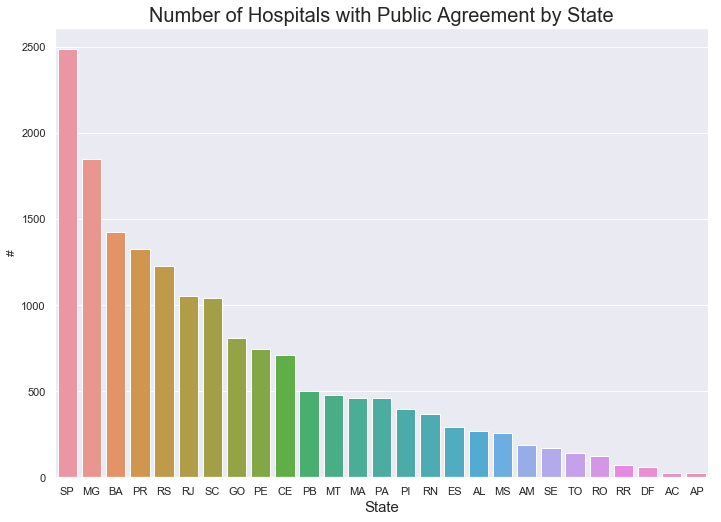

In [55]:
#-- plotting the hospitals with Public Agreement by State
sns.barplot(x=db_sus_s['UF2'], y=db_sus_s['CONVÊNIO SUS?'])
plt.title('Number of Hospitals with Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

In [26]:
#-- filtering the dataset by only hospital without Puclib Agreement
db_n = db[db['CONVÊNIO SUS?'] == 'NÃO']
db_sus_n = db_n.groupby(['UF'])['CONVÊNIO SUS?'].count()
db_sus_n = pd.DataFrame(db_sus_n)
db_sus_n['UF2'] = db_sus_n.index

In [57]:
#-- ordering the data by values
db_sus_n.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)
db_sus_n.head()

,CONVÊNIO SUS?,UF2
UF,,
SP,11220,SP
MG,5339,MG
RJ,4185,RJ
BA,3284,BA
RS,2568,RS


Text(0, 0.5, '#')

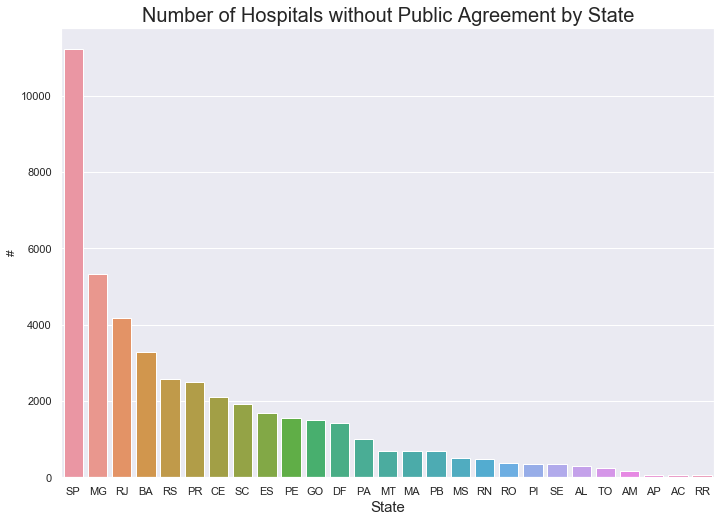

In [58]:
#-- plotting the hospitals without Public Agreement by State
sns.barplot(x=db_sus_n['UF2'], y=db_sus_n['CONVÊNIO SUS?'])
plt.title('Number of Hospitals without Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

In [30]:
#-- ordering dataset by the name of States
db_sus_s.sort_values(['UF2'], ascending=False, inplace=True)
db_sus_n.sort_values(['UF2'], ascending=False, inplace=True)

In [31]:
#-- calculating the proportion between hospitals without/with Public Agreement
prop = db_sus_n.iloc[:,0] / db_sus_s.iloc[:,0]

In [33]:
#-- making a dataframe
prop = pd.DataFrame(prop)

In [34]:
#-- creating a new column
prop['UF2'] = prop.index

In [37]:
#-- ordering the dataset by the number os states with more hospitals without Public Agreement proportional
prop.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)

Text(0, 0.5, '#')

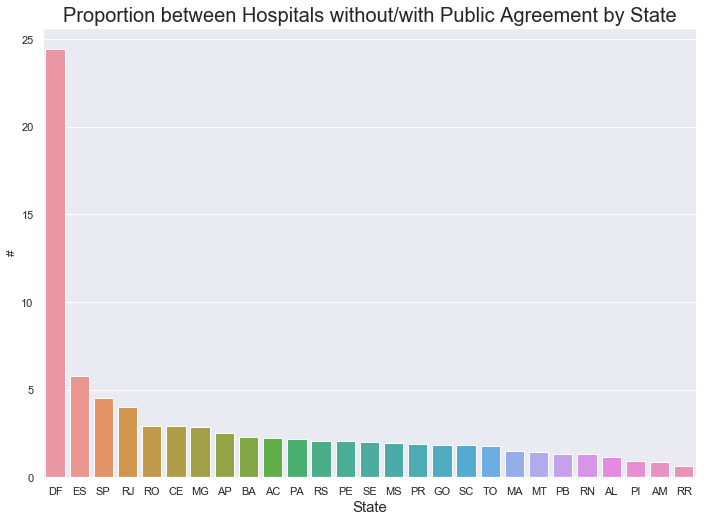

In [59]:
#-- plotting the States with more hospitals without Public Agreement
sns.barplot(x=prop['UF2'], y=prop['CONVÊNIO SUS?'])
plt.title('Proportion between Hospitals without/with Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

# Cluster Analysis

>To keep moving with this analysis, next step could be a cluster analysis or even a correlation between population and GBP from those States...